# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [69]:
import pandas as pd
%matplotlib inline

## imports for Python, Pandas

In [70]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [5]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [71]:
data

[{'counties': [{'name': 'Dade', 'population': 12345},
   {'name': 'Broward', 'population': 40000},
   {'name': 'Palm Beach', 'population': 60000}],
  'info': {'governor': 'Rick Scott'},
  'shortname': 'FL',
  'state': 'Florida'},
 {'counties': [{'name': 'Summit', 'population': 1234},
   {'name': 'Cuyahoga', 'population': 1337}],
  'info': {'governor': 'John Kasich'},
  'shortname': 'OH',
  'state': 'Ohio'}]

In [72]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [7]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [8]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [11]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
json
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


In [372]:
#****
## JSON exercise

#Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
#1. Find the 10 countries with most projects
#2. Find the top 10 major project themes (using column 'mjtheme_namecode')
#3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [373]:
#Reading the actual dataset to work with.
actual_json_df = pd.read_json('data/world_bank_projects.json')

Text(0,0.5,'Number of projects')

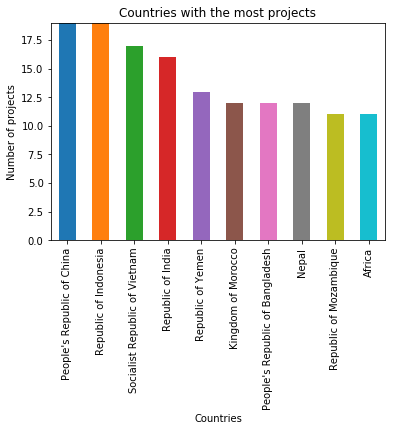

In [370]:
#Assigned the original data frame to a variable 't'
t = actual_json_df
#Extracted just the countryname and project_name columns
t1 = t[['countryname', 'project_name']]
#Applied value_counts to count the number of projects each country had
t1 = t1.countryname.value_counts()
#Since we want the result for the 10 countries with most projects, sorted values in decending order
t1 = t1.sort_values(ascending=False)
#Offset the 10 most frequent values
t1 = t1.head(10)
#Plotted a bar graph for the countries with the most projects
k = t1.plot(kind = 'bar', ylim = [0,19], title = 'Countries with the most projects')
k.set_xlabel('Countries')
k.set_ylabel('Number of projects')




In [366]:
#In the second part of the question, the goal is to figure out the most popular themes

In [368]:
#On observing the data below, we can concur that the data is a list of dictionaries
actual_json_df['mjtheme_namecode'].head(3)

0    [{u'code': u'8', u'name': u'Human development'...
1    [{u'code': u'1', u'name': u'Economic managemen...
2    [{u'code': u'5', u'name': u'Trade and integrat...
Name: mjtheme_namecode, dtype: object

In [374]:
#Assigned the dataframe with the column of interest to avariable t2
t2 = actual_json_df['mjtheme_namecode']
#Initializing the empty dataframe
j3 = pd.DataFrame()
#The for loop below normalizes each unique row and appends it to the dataframe j3
for i in t2:
    j = json_normalize(i, 'code', 'name')
#Concatenating the dataframe
    j3 = pd.concat([j3,j], ignore_index=True)
#Renamed the columns for the new dataframe
j3.columns = ['code', 'name']
#Converted the type from str to numberic for column 'code'
j3['code'] = pd.to_numeric(j3['code'])
#Sorted values in ascneding order of code
j3 = j3.sort_values('code')
#Printed the first few rows of the new dataframe
j3.head()



,code,name
1534,0,Rural development
215,0,Rural development
458,0,Rural development
217,0,Rural development
1517,0,Rural development


Text(0,0.5,'Count')

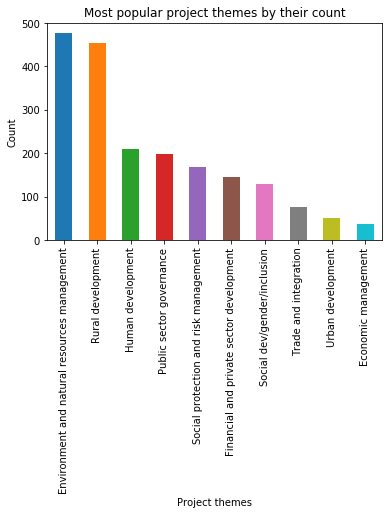

In [364]:
#Now that we have the data of interest in pandas dataframe, I have attempted to clean up missing data
import numpy as np
#Defined a function that assigns a NaN value for a blank value in the name columns
def fill_values(names):
    if names == '':
        return np.nan
    else:
        return names
#Applied the function over the name column
j3['name'] = j3.name.apply(fill_values)
#Fills the NaN with forward fill
j3['name'] = j3['name'].fillna(method = 'ffill')
#Utilized value_counts to the number of each project theme
rg = j3['name'].value_counts()
rg = rg.sort_values(ascending=False)
#We are only interested in the ten most popular themes
gr = rg.head(10)
#Plotted graph below
x = gr.plot(kind = 'bar', title = 'Most popular project themes by their count')
x.set_xlabel('Project themes')
x.set_ylabel('Count')